# Pre processing

In [2]:
# Libraries for text preprocessing
import re
import nltk

#nltk.download('stopwords')
from nltk.corpus import stopwords

from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer

#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer

re => regular expression
nltk => natural language tool kit

stopwords => obvious but 'and','is' etc
wordnet =>used for finding meanings,anotnyms,synonyms etc of words

RegexpTokenizer => obvious

PorterStemmer => stemming removes suffixes to give us the root word
WordNetLemmatizer => works with the root words
(look into porter + wordnetlemmatizer properly)

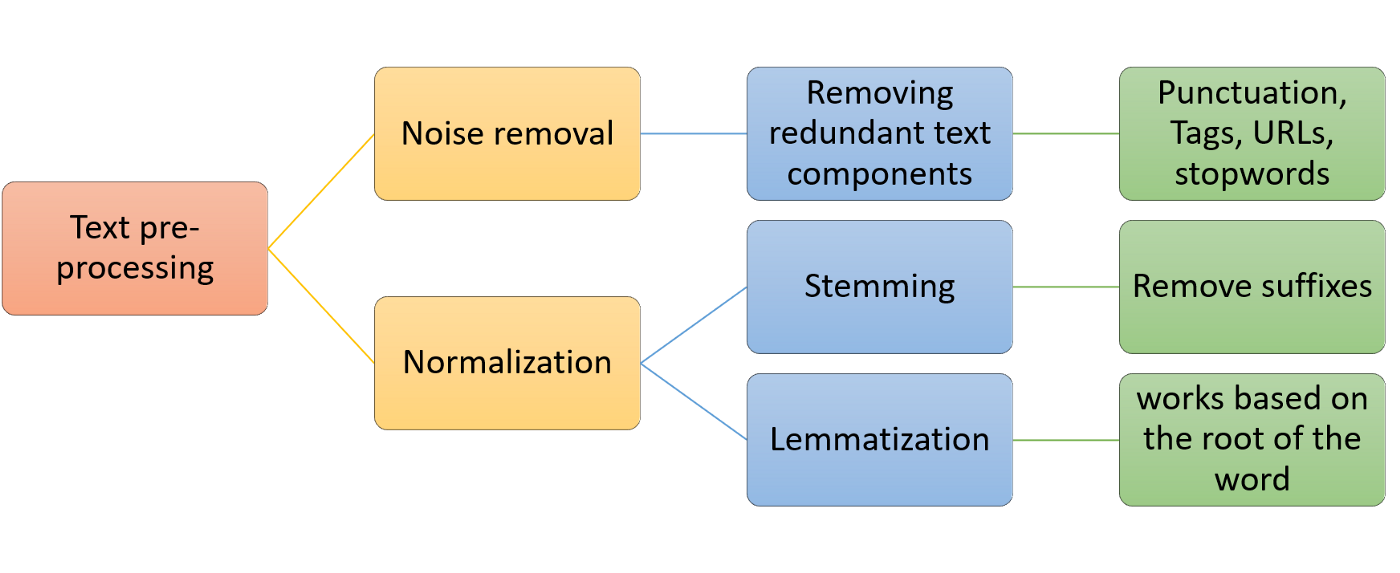

In [3]:
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))
##Creating a list of custom stopwords
new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown"]
stop_words = stop_words.union(new_words)

In [4]:
#Loading the database
import pandas as pd
df = pd.read_csv('bart900.csv')
df.head()

,Unnamed: 0,bart,fulltxt,inshorts,bert
0,0,Sara Ali Khan came as a guest on the latest ep...,Sara Ali Khan came as a guest on the latest ep...,"At Kareena Kapoor Khan's radio show, Sara Ali ...",Sara Ali Khan came as a guest on the latest ep...
1,1,The United States stands ready to spend up to ...,The United States stands ready to spend up to ...,The US has offered up to $100 million to assis...,The United States stands ready to spend up to ...
2,2,Ravindra Jadeja runs out James Neesham with a ...,Dont take on Jadeja started to trend after Ind...,India all-rounder Ravindra Jadeja in the secon...,Dont take on Jadeja started to trend after Ind...
3,3,Bats are known carriers of the latest strain o...,Chinese researchers investigating the animal o...,Chinese researchers investigating the animal o...,Chinese researchers investigating the animal o...
4,4,Parveen Sultana Abdul Rasheed arrived at the K...,Kolkata: A womanwas intercepted at the Kolkata...,A woman named Parveen Sultana Abdul Rasheed wa...,Kolkata: A womanwas intercepted at the Kolkata...


In [31]:
#clean text function
def preprocess(articles):
    corp = []
    for text in articles:
        try:
            #Remove punctuations
            text = re.sub('[^a-zA-Z]', ' ', text)
            
            #Convert to lowercase
            text = text.lower()

            #remove tags
            text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)

            # remove special characters and digits
            text=re.sub("(\\d|\\W)+"," ",text)

            ##Convert to list from string
            text = text.split()

            ##Stemming
            ps=PorterStemmer()
            #Lemmatisation
            lem = WordNetLemmatizer()
            text = [lem.lemmatize(word) for word in text if not word in stop_words] 
            text = ' '.join(text)
            corp.append(text)
        except:
            continue
    return corp

In [12]:
corro = preprocess([ df['fulltxt'][0] ])
corro

After Camel Case
Sara Ali Khan Kareena Kapoor Khans What Women Want During Kareena Sara When Sara Kareena Sara Kareena Not Im Im It Sara Kareena Sara Like Sara People If Also Sara Ali Khan When Sara She If When Because Im Im If Im According Sara Love Aaj Kal Kartik Aaryan However Follow


['sara ali khan kareena kapoor khan woman want kareena sara sara kareena sara kareena im im sara kareena sara like sara people sara ali khan sara im im im according sara love aaj kal kartik aaryan however follow']

In [10]:
df['fulltxt'].tolist()

['Sara Ali Khan came as a guest on the latest episode of Kareena Kapoor Khans radio show What Women Want, where the two actors discussed modern relationships. During the interaction, Kareena asked Sara what qualities she would want in her man.When Sara said honesty, Kareena said that it was not the first thing she would notice in someone. Sara then said she would see if he was fun and has a sense of humour. Kareena was surprised that good looks was not on the list.Not really. Im not one of those. Im okay without that. It will probably be better because then they wouldnt be self-obsessed, which is something I cant handle, Sara said.Kareena looked at her in disbelief, so Sara added, I mean, he doesnt have to be bad-looking, but he doesnt have to be so good-looking that thats all we talk about. Like, thats something that one can avoid for sure.Sara then went on to say that she wants someone who is self-assured. I think somebody thats, more than good-looking or anything, just comfortable i

In [14]:
corpus = preprocess( df['fulltxt'].tolist() )
corpus

After Camel Case
Sara Ali Khan Kareena Kapoor Khans What Women Want During Kareena Sara When Sara Kareena Sara Kareena Not Im Im It Sara Kareena Sara Like Sara People If Also Sara Ali Khan When Sara She If When Because Im Im If Im According Sara Love Aaj Kal Kartik Aaryan However Follow
After Camel Case
The United States China U Secretary State Mike Pompeo Friday This American U Pompeo He U
After Camel Case
Dont Jadeja India Ravindra Jadejas James Neesham OD New Zealand Eden Park Auckland Saturday In New Zealand Ross Taylor Navdeep Saini Non Jimmy Neesham Jadeja The India Neesham India New Zealand OD WATC Video Ravindra Jadeja Jimmy Neesham You Rajput Do Fwa You Jadeja Ross Taylor You Jadeja N Zv IN LV Bhmz EF India New Zealands Just Martin Guptill Shardul Thakur India New Zealand India Virat Kohli Auckland But India But Ross Taylor Kyle Jamieson For India Yuzvendra Chahal Kuldeep Yadav He Shardul Thakur But India Ravindra Jadeja He
After Camel Case
Chinese China Bats China But Arnaud 

After Camel Case
The Trump United States U Applicants U Federal Register They U Children U American The U And Those U Closing United States White House Stephanie Grisham It American The American The United States U United States Friday While Trump U Mexico Those Mexico Donald Trumps Trump The Republican Regulating And Consular But U Birth U Companies Many Russia China U The U Trump An United States U United States U There U The Center Immigration Studies U This The United States
After Camel Case
Pranab Mukherjee Thursday Indias Mukherjee Indias Sukumar Sen Election Commission India EC The Their Constitution India Mukherjee Democracy While Mukherjee Citizenship Amendment Act CA Those CA Muslims This Mukherjee Union Congress In EC These Model Code Conduct MC Parliament There Whenever Lok Sabha M Ps M Ps Rajya Sabha Mukherjee EC Peoples
After Camel Case
At Odishas Kendrapara Thursday The Maa Shankatatarini Chandan Nagar Deuli Pattamundai Kendrapara Many They However Pattamundai Sub Divisi

After Camel Case
The Islamic State Amir Mohammed Abdul Rahman Mawli Salbi He Iraqs Yazidi The Guardian Salbi Abu Bakr Baghdadi October The Baghdadis Abu Ibrahim Hashimi Quraishi In Baghdadi Salbi Isis Baghdadi Salbi Isis Born Iraqi Turkmen Tal Afar Arabs He Haji Abdullah Abdullah Qardash Iraqi Isis Salbi Islamic Yazidis Nieveh Plains Iraq Isis Salbi University Mosul In U Camp Bucca Iraq Baghdadi He Before Baghdadis U Syria October U Salbis Salbi Baghdadi August Since Isis Salbi Isiss U Iraqi Isis Baghdadi Islamic However Syria March Kurdish Iraq Isis December Baghdadi Isis Abu Hassan Muhajir Iraqi Kurdish Weve Isis Were Iraqi Their Isis Iraq That The Salbi Turkey Adel Salbi Turkmen Iraqi Front The Isis Intelligence Baghdadi Idlib Mosul The Mosul Another Isis Shifa Nima Mosul He Iraqi Nima Across Syria British French European Isis Al Hol Roj Syrian Kurdish Corners Hol Kurdish What Isis Syria European Isis Britain Shamima Begum U Syria The U Hoda Mothana Isis Syria January
After Camel Ca

After Camel Case
BERLI Reuters Social German Foreign Office Twitter The Seduce Someonein Words Submissions Thursday You Im Donald Trump Is Impeached Then Germany Diplo English Your That But German Germany In Middle East Africa Europes Germany But Would That British So Twitter Even German Consulate Turkish Rahsan Gulsan Germany Diplo Being We Our Reporting Thomas Escritt
After Camel Case
Actor Shah Rukh Khan Friday Ab Ram The Sharing Shah Rukh Day Races My Gold Medal Silver Bronze In Shah Rukh Ab Ram Day Races My Gold Medal Silver Bronze Nqj J Also Kangana Ranaut Deepika Padukones JN On Thursday Shah Rukh Amazon Jeff Bezos India Speaking Shah Rukh He Amazon My Big Basket It Shah Rukh Zero The Speaking Shah Rukh Indian Film Festival Melbourne So As Im Coming Melbourne The Hindi Tamil Tamil Atlee Follow
After Camel Case
Former India Bapu Nadkarni Tests Friday He Nadkarni Mumbai Maharashtra In Tests Nadkarni New Zealand Wellington He England Kanpur February In Nadkarni Test India England C

After Camel Case
San Francisco Apple Mac Book Magic Keyboard The Eurasian Economic Commission EE Apple Mac Monday The Apple Mac Book Pro Mac Book The Apple O It Mac Book Pro Apple Magic Keyboard Pro Apple Mac Book Mac Book Pro However According Macrumors It
After Camel Case
Bharatiya Janata Party BJ Udayanraje Bhosale Chhatrapati Shivaji Tuesday Shiv Sena Nationalist Congress Party NC Maratha Udayanraje Bhosale Satara Lok Sabha Prime Minister Narendra Modi Maratha The Congress Maharashtra Tuesday NC Sena BJ The BJ Monday Aaj Ke Shivaji Narendra Modi Jai Bhagwan Goyal Sena Delhi Maharashtras Sena Congress NC Bhosale Sena NC NC Sharad Pawar Janata Raja Shivaji Maharashtra Calling Janata Raja Shivaji Maharaj Nobody Shivaji Maharaj Bhosale Pawars Pawar Janata Raja Did Shiv Sena Shivajis Sena Shivaji Various Shivajis Bhosale The M Sena Remove Shiv Shiv Sena Thackeray Sena Bhosale Senior Sena Rajya Sabha Sanjay Raut Udayanraje Bhosale Shivendraraje Bhosale Shivaji The Chhatrapati Shivaji Mah

After Camel Case
MUMBA Emami Group Nuvoco Vistas Corp Ltd Nirma Kolkata The Emami Thursday The Emami Last Emami Ltd Emami Cement Ltd Risdah Chhattisgarh Bihar West Bengal Odisha It Chhattisgarh Rajasthan Andhra Pradesh This Manish Goenka Emami Group We Emami Cements Nuvoco Law Khaitan Co Haigreve Khaitan Mehul Shah Ashraya Rao Nirma Emami Shardul Amarchand Mangaldas This Nirmas India In Nirma Lafarge Indias Lafarge India The Emami Nuvocos India Jojobera The Chhattisgarh Rajasthan West Bengal Bihar Jharkhand Odisha Haryana The Indian In Reliance Infrastructure Ltd Birla Corp Ltd Anil Ambani Ultra Tech Cement Ltd Binani Cement Ultra Tech Jaiprakash Associates Jaypee Group While As Mumbai Ajay Garg Equirus Capital Changes Garg With Ultra Tech Cement
After Camel Case
NE DELH French Total S Adani Groups Indias Total Adani Green Energy Ltd M Thursday Adani Green Energy The French Gautam Adani Indias The The Overall Adani Green Energy G It Solar Energy Corporation India Ltds G We Total Adani 

After Camel Case
LILONGW Reuters Malawis Constitutional Court Monday May Peter Mutharika Mutharika Malawi Lazarus Chakwera Deputy President Saulos Chilima The Mutharika Mutharika But Chakwera Chilima High Court In It Justice Healey Potani However May In The Potani Chilima The Parliament Supreme Court Appeal Judge Jane Ansah The Lilongwe Blantyre Security Malawi Great Rift Valley Former Mutharika Reporting Frank Phiri Editing Grant Mc Cool Lisa Shumaker
After Camel Case
Filmmaker Vidhu Vinod Chopras Shikara Avatar Titanic James Cameron Towards Cameron Shikara Cameron Oscar Alfonso Cuaron Chopras Hollywood Broken Horses Shikara Hindu Kashmir Chopra Kashmiri Pandit Shikara It The Sadia Shanti Dhar Aadil Khan Shiv Kumar Dhar Chopra Pandits Its Pandit Nobody Our Speaking PT This It Just It My Follow
After Camel Case
New Delhi Bullish Google Pay India Alphabet Google CE Sundar Pichai Two India Google Google Pay MA Us India September The Unified Payments Interface UP We We India Pichal Monday

After Camel Case
CAIR Reuters The Palestinian Authority United States Israel Middle East President Donald Trump Palestinian President Mahmoud Abbas Saturday Abbas Cairo Arab League Palestinians Trumps The Israeli Prime Minister Benjamin Netanyahu Palestinian Jewish Israeli Weve Israeli United States Abbas Trumps Israeli Israel Palestinian Authoritys West Bank Palestinian The P CI Palestinians Trump Abbas Trump Trump Abbas Trump Abbas He Trump Tuesday Jerusalem The Israeli West Bank Jerusalem Israels The Arab League Cairo Palestinians League United States The Palestinian Israel Middle East East Jerusalem Foreign Egypt Saudi Arabia Jordan Iraq Lebanon Palestinian After Trump Arab Palestinians United States Iran Arab Three Gulf Arab Oman Bahrain United Arab Emirates White House Trump Netanyahu On Tuesday Netanyahu Israeli Jewish West Bank Such Jordan Valley Israel Most Israeli Trump Reporting Omar Fahmy Ulf Laessing Rami Ayyub Nidal Mughrabi Dan Williams Editing Frances Kerry Kevin Liffey

['sara ali khan kareena kapoor khan woman want kareena sara sara kareena sara kareena im im sara kareena sara like sara people sara ali khan sara im im im according sara love aaj kal kartik aaryan however follow',
 'united state china u secretary state mike pompeo friday american u pompeo u',
 'dont jadeja india ravindra jadejas james neesham od zealand eden park auckland saturday zealand ross taylor navdeep saini non jimmy neesham jadeja india neesham india zealand od watc video ravindra jadeja jimmy neesham rajput fwa jadeja ross taylor jadeja n zv lv bhmz ef india zealand martin guptill shardul thakur india zealand india virat kohli auckland india ross taylor kyle jamieson india yuzvendra chahal kuldeep yadav shardul thakur india ravindra jadeja',
 'chinese china bat china arnaud fontanet france pasteur institute af sars china many several fontanet south china agricultural university xinhua james wood university cambridge investigation simply rn martine peeters france institute rese

#Building word vectors etc

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
max_df — When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words). This is to ensure that we only have words relevant to the context and not commonly used words.
max_features — determines the number of columns in the matrix.
n-gram range — we would want to look at a list of single words, two words (bi-grams) and three words (tri-gram) combinations.

# Showing off the skills ( ignore and go to next section)

In [ ]:
#first 10 unique keywords in all the articles
list(cv.vocabulary_.keys())[:10]

In [ ]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

In [ ]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)
#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

In [ ]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)
#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

#Using the vector to identify the keywords 

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)
# get feature names
feature_names=cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
doc=corpus[532]
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

In [ ]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,5)
 
# now print the results
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])

#dumping data into a pickel

In [15]:
import pickle
import os

In [16]:
pickle.dump([cv, tfidf_transformer, feature_names], open('vector.pickel','wb'))

NameError: name 'cv' is not defined

In [ ]:
df['fulltxt'][0]

In [ ]:
a = 'Sara Ali Khan came as a guest on the latest episode of Kareena Kapoor Khans radio show What Women Want, where the two actors discussed modern relationships. During the interaction, Kareena asked Sara what qualities she would want in her man.When Sara said honesty, Kareena said that it was not the first thing she would notice in someone. Sara then said she would see if he was fun and has a sense of humour. Kareena was surprised that good looks was not on the list.Not really. Im not one of those. Im okay without that. It will probably be better because then they wouldnt be self-obsessed, which is something I cant handle, Sara said.Kareena looked at her in disbelief, so Sara added, I mean, he doesnt have to be bad-looking, but he doesnt have to be so good-looking that thats all we talk about. Like, thats something that one can avoid for sure.Sara then went on to say that she wants someone who is self-assured. I think somebody thats, more than good-looking or anything, just comfortable in their own skin. I think thats rare today. People that just own who they are are rare and very, very attractive. If you can be true to who you are, theres nothing like that, she said.Also read: Sara Ali Khan says anyone who tries to remind her of parentage is only trying to pressurise herWhen asked about the one thing that she would never compromise on in a relationship, Sara said fidelity. She said, If and when I get into a relationship, it would have to be with someone that I can proudly say is mine. When I say fidelity, I dont necessarily mean cheating on somebody or anything like that but I mean whole-heartedly being mine. Because Im a very independent girl. Im driven by my work, I have great friends, I have a solid support system, I have a good familyso I dont really need very much. If I was to go out of my way and make space for someone special in my life, it would have to be someone that Im proud of.According to reports, Sara was in a relationship with her Love Aaj Kal co-star Kartik Aaryan, whom she has admitted to having a crush on, but they have now parted ways. However, she has denied ever being in a relationship with him.Follow @htshowbiz for more'

In [ ]:
c = preprocess([a])
c

#getting keywords

WOEID list json file stored

API key:
hKcXgwjy49lfzk9Q60brB1XXW

API secret key:
iD8G8v7EQVl2VAUxlghAHM8teOZNq5SYDHt9ck8bRO5gP8ix1t

Acess Token:
599146573-oub5Sdq8Jp8zEEiiy4UrYQkWsmPLbtwuc1GyrRsg

Access Token Secret:
GMEGlJq89TkzhPHU0DhcYnPA1s7bjsFOKNZtYUrpCsLYm

In [17]:
#using india's woeid
woeid = 23424848
api_key = 'hKcXgwjy49lfzk9Q60brB1XXW'
api_secret = 'iD8G8v7EQVl2VAUxlghAHM8teOZNq5SYDHt9ck8bRO5gP8ix1t'
token_key = '599146573-oub5Sdq8Jp8zEEiiy4UrYQkWsmPLbtwuc1GyrRsg'
token_secret = 'GMEGlJq89TkzhPHU0DhcYnPA1s7bjsFOKNZtYUrpCsLYm'

In [18]:
import tweepy

In [19]:
auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(token_key, token_secret)
api = tweepy.API(auth)

In [20]:
trends = api.trends_place(woeid)

In [25]:
y = [x['name'] for x in trends[0]['trends']]
y
y = preprocess(y)
for x in y:
    if x != '':
        print(x)

Before Camel Case
TAEKOOK
After Camel Case
TAEKOOK
Before Camel Case
 InConversationWithRahulGandhi
After Camel Case
In Conversation With Rahul Gandhi
Before Camel Case
 EducationMinisterGoesLive
After Camel Case
Education Minister Goes Live
Before Camel Case
 KarlMarx
After Camel Case
Karl Marx
Before Camel Case
 NEET
After Camel Case
NEET
Before Camel Case
 tuesdayvibes
After Camel Case

Before Camel Case
Pulitzer
After Camel Case
Pulitzer
Before Camel Case
Rs     
After Camel Case
Rs
Before Camel Case
             
After Camel Case

Before Camel Case
Nobel
After Camel Case
Nobel
Before Camel Case
Pakherpora
After Camel Case
Pakherpora
Before Camel Case
OGAS TO CAPF
After Camel Case
OGA T CAPF
Before Camel Case
Sam Pitroda
After Camel Case
Sam Pitroda
Before Camel Case
Delhi Government
After Camel Case
Delhi Government
Before Camel Case
Abhijeet Banerjee
After Camel Case
Abhijeet Banerjee
Before Camel Case
 WorldAsthmaDay
After Camel Case
World Asthma Day
Before Camel Case
          

# Making a config file to save api details

In [26]:
import configparser
config = configparser.ConfigParser()

In [28]:
config['twitter_api'] = {
    'api_key' : 'hKcXgwjy49lfzk9Q60brB1XXW',
    'api_secret' : 'iD8G8v7EQVl2VAUxlghAHM8teOZNq5SYDHt9ck8bRO5gP8ix1t',
    'token_key' : '599146573-oub5Sdq8Jp8zEEiiy4UrYQkWsmPLbtwuc1GyrRsg',
    'token_secret' : 'GMEGlJq89TkzhPHU0DhcYnPA1s7bjsFOKNZtYUrpCsLYm'
}
config['woeid'] = {
    'woeid' : 23424848
}

In [29]:
with open('dailyNews.ini', 'w') as configfile:
    config.write(configfile)

# Hindu check

In [32]:
import requests
from bs4 import BeautifulSoup

In [33]:
url = 'https://www.thehindu.com/'

In [35]:
html_doc = requests.get(url)
html_doc.text

'<!DOCTYPE html>\n<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en" lang="en">\n<head>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<title>\nThe Hindu: Breaking News, India News, Sports News and Live Updates\n</title>\n<meta name="viewport" content="width=device-width, initial-scale=1.0">\n<meta name="title" content="Breaking News, India News, Sports News and Live Updates" />\n<meta name="atdlayout" content="homepage" /> <meta name="description" content="Today&#39;s News Headlines, Breaking News &amp; Latest News from India and World, News from Politics, Sports, Business, Arts and Entertainment" />\n<meta name="twitter:title" content="Breaking News, India News, Sports News and Live Updates">\n<meta name="twitter:description" content="Today&#39;s News Headlines, Breaking News &amp; Latest News from India and World, News from Politics, Sports, Business, Arts and Entertainment">\n<meta name="twitter:image" content="https://www.thehindu.com/static/

In [65]:
soup = BeautifulSoup(html_doc.text, 'html.parser')

In [69]:
for x in soup.find_all('ul', class_='list-in'):
    print(x)
    print('NL')

<ul class="list-in line">
<li><a href="https://www.thehindu.com/topic/coronavirus/">Coronavirus</a></li>
<li><a href="https://www.thehindu.com/topic/citizenship-amendment-act/">Citizenship Amendment Act</a></li>
<li><a href="https://www.thehindu.com/topic/fact-check/">Fact Check</a></li>
<li class="housing"><a href="https://www.thehindu.com/housing-real-estate-india/"><img src="https://www.thehindu.com/housing-real-estate-india/r9q0f9/article30495011.ece/BINARY/Housingmenu"/></a></li>
</ul>
NL
<ul class="list-in line">
<li><a href="https://www.thehindu.com/topic/coronavirus/">Coronavirus</a></li>
<li><a href="https://www.thehindu.com/topic/citizenship-amendment-act/">Citizenship Amendment Act</a></li>
<li><a href="https://www.thehindu.com/topic/fact-check/">Fact Check</a></li>
<li class="housing"><a href="https://www.thehindu.com/housing-real-estate-india/"><img src="https://www.thehindu.com/housing-real-estate-india/r9q0f9/article30495011.ece/BINARY/Housingmenu"/></a></li>
</ul>
NL


In [67]:
x

[<ul class="list-in line">
 <li><a href="https://www.thehindu.com/topic/coronavirus/">Coronavirus</a></li>
 <li><a href="https://www.thehindu.com/topic/citizenship-amendment-act/">Citizenship Amendment Act</a></li>
 <li><a href="https://www.thehindu.com/topic/fact-check/">Fact Check</a></li>
 <li class="housing"><a href="https://www.thehindu.com/housing-real-estate-india/"><img src="https://www.thehindu.com/housing-real-estate-india/r9q0f9/article30495011.ece/BINARY/Housingmenu"/></a></li>
 </ul>,
 <ul class="list-in line">
 <li><a href="https://www.thehindu.com/topic/coronavirus/">Coronavirus</a></li>
 <li><a href="https://www.thehindu.com/topic/citizenship-amendment-act/">Citizenship Amendment Act</a></li>
 <li><a href="https://www.thehindu.com/topic/fact-check/">Fact Check</a></li>
 <li class="housing"><a href="https://www.thehindu.com/housing-real-estate-india/"><img src="https://www.thehindu.com/housing-real-estate-india/r9q0f9/article30495011.ece/BINARY/Housingmenu"/></a></li>
 <

In [61]:
soup = BeautifulSoup(str(x[0]))

In [62]:
x = soup.ul.decompose()

In [64]:
x